In [1]:
import os
import glob
import h5py
import json
import matplotlib.pyplot as plt
import numpy as np
import datetime
import pandas as pd


In [2]:
# copy paste this code to the beginning of your script to set the plotting style for a one column figure

from matplotlib import pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "figure.constrained_layout.use": True
})

plt.rcParams["savefig.bbox"] = None
plt.rcParams["figure.figsize"] = (5.9,3.5)  # (width, height) in inches, change height but not width
plt.rcParams["figure.titlesize"] = 10 # this is only for plt.suptitle, i set it to be the same as the rest

plt.rcParams["axes.titlesize"] = 10 # control title size
plt.rcParams["axes.labelsize"] = 10 # control x and y axis labels
plt.rcParams["axes.labelpad"] = 4.0 # distance between axis label and axis numbers
plt.rcParams["xtick.labelsize"] = 10 # independent control of xlabel fontsize
plt.rcParams["ytick.labelsize"] = 10 # independent control of ylabel fontsize

plt.rcParams["legend.fontsize"] = 7.5 # control legend size, I set it to be slightly smaller than title/axes label
# plt.rcParams["legend.facecolor"] = (0.9, 0.9, 0.9) # legend background color
# plt.rcParams["legend.edgecolor"] = (0, 0, 0) # legend border line color
# plt.rcParams["legend.frameon"] = True # whether or not to draw a border around legend
# plt.rcParams["legend.framealpha"] = 0.1 # legend background transparency
plt.rcParams["legend.loc"] = "best" # default legend location
plt.rcParams["legend.handletextpad"] = 0.8  # Horizontal space between legend point and text (default 0.8)
plt.rcParams["legend.labelspacing"] = 0.6  # Vertical space between legend entries (default 0.5)
# plt.rcParams["legend.columnspacing"] = 2.0  # Space between columns in multi-column legends
# plt.rcParams["legend.borderpad"] = 1.0  # Space between legend content and the box
# plt.rcParams["legend.handlelength"] = 2.0  # Length of legend marker lines

plt.rcParams["lines.linewidth"] = 1
plt.rcParams["lines.markersize"] = 6 #data point size

# CHOOSE NICE COLOR FOR DARK MARKER EDGEWIDTH FROM "dodgerblue","mediumseagreen","crimson","mediumpurple","slateblue","darkorange","peru","goldenrod"
plt.rcParams["lines.linewidth"] = 1
plt.rcParams["lines.markersize"] = 6 #data point size
plt.rcParams["lines.markeredgewidth"] = 1.5 # width of the edge of the marker
plt.rcParams["lines.markeredgecolor"] = "black" # color of the edge of the marker
plt.rcParams["lines.markerfacecolor"] = "crimson" # color of the inside of the marker
plt.rcParams["lines.marker"] = "o" # marker type, see https://matplotlib.org/stable/api/markers_api.html for all options
plt.rcParams["lines.color"] = "black" # color of the line
# # CHOOSE NICE COLOR FOR DARK MARKER EDGEWIDTH FROM "dodgerblue","mediumseagreen","crimson","mediumpurple","slateblue","darkorange","peru","goldenrod"


plt.rcParams["grid.linestyle"] = "--"
plt.rcParams['axes.grid'] = True
# plt.rcParams["grid.linewidth"] = 0.7

# plt.rcParams["xtick.major.pad"] = 4.0 # distance between xticks dashes and xaxis numbers
# plt.rcParams["xtick.major.size"] = 3.0
# plt.rcParams["xtick.major.width"] = 0.7
# plt.rcParams["ytick.major.pad"] = 4.0 # distance between yticks dashes and yaxis numbers
# plt.rcParams["ytick.major.size"] = 3.0
# plt.rcParams["ytick.major.width"] = 0.7

In [3]:
df = pd.read_csv('Default Dataset.csv')

In [4]:
df

,344.39545144271386,0.0027376999998276474
0,344.596665,0.002756
1,344.797879,0.002774
2,344.999093,0.002792
3,345.200307,0.002810
4,345.397455,0.005444
5,345.594350,0.007279
6,345.795479,0.004269
7,345.996608,0.004287
8,346.197738,0.004305
9,346.398867,0.004323


In [5]:
freq = df.iloc[:,0].values
transferefficiency = df.iloc[:,1].values

freq = np.array(freq)
transferefficiency = np.array(transferefficiency)

In [6]:
freq = np.delete(freq, -10)
transferefficiency = np.delete(transferefficiency, -10)

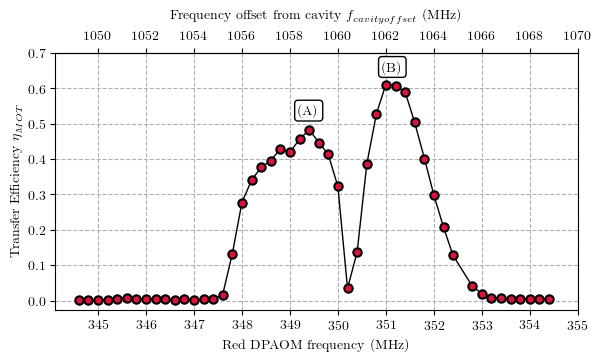

In [57]:
fig, ax = plt.subplots()

ax.plot(freq, transferefficiency, 'ko-')
ax.set_xlabel('Red DPAOM frequency (MHz)')
ax.set_ylabel(r'Transfer Efficiency $\eta_{MOT}$')
# Define the transformation functions for the secondary x-axis
def freq_to_offset(x):
    return x * 2 + 460 - 100 
def offset_to_freq(x):
    return (x + 100 - 460) / 2
# Apply the transformation functions for the secondary axis
ax_top = ax.secondary_xaxis('top', functions=(freq_to_offset, offset_to_freq))
ax_top.set_xlabel(r'Frequency offset from cavity $f_{cavityoffset}$ (MHz)', labelpad=8)

# set xticks for x axis as 345, 346 ... 353, 354, 355
ax.set_xticks(np.arange(345, 356, 1))
ax_top.set_xticks(freq_to_offset(np.arange(345, 356, 1)))

ax.text(
    0.485, 0.775, " (A)",
    transform=ax.transAxes,
    fontsize=10,
    fontweight='bold',
    va='center',
    ha='center',
    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.25')
)

ax.text(
    0.645, 0.945, " (B)",
    transform=ax.transAxes,
    fontsize=10,
    fontweight='bold',
    va='center',
    ha='center',
    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.25')
)

plt.ylim(-0.025,0.7)

plt.savefig("250502 BBRedMOTSpectroscopy.pdf")

In [ ]:
s